In [3]:
import pandas
# df = pandas.read_pickle("/root/data/qm/muVulDeePecker/pkl_data/sard_both_all.pkl")
# df_sub = pandas.read_pickle("/root/data/qm/muVulDeePecker/pkl_data/sard_all_sub.pkl")
# df = pandas.read_pickle("/root/data/qm/muVulDeePecker/pkl_data/real_both_all.pkl")
df = pandas.read_pickle("/small-ase2022/data/mvd_allkfold_40_test.pkl")
# /small-ase2022/data/mvd_allkfold_40_test.pkl


In [ ]:
df

,gadget,val,tokenized,not_tokenized,len_txt1,len_txt2
0,[int ff_ivi_decode_frame(AVCodecContext *avctx...,0,"[int, FUN1, (, VAR1, *, VAR2, ,, void, *, VAR3...","[int, ff_ivi_decode_frame, (, AVCodecContext, ...",724,752
1,"[int ffv1_init_slice_state(FFV1Context *f, FFV...",0,"[int, FUN1, (, VAR1, *, VAR2, ,, VAR1, *, VAR3...","[int, ffv1_init_slice_state, (, FFV1Context, *...",209,209
2,"[static void add_entry(TiffEncoderContext *s, ...",0,"[static, void, FUN1, (, VAR1, *, VAR2, ,, enum...","[static, void, add_entry, (, TiffEncoderContex...",150,150
3,[static int check_bits_for_superframe(GetBitCo...,0,"[static, int, FUN1, (, VAR1, *, VAR2, ,, VAR3,...","[static, int, check_bits_for_superframe, (, Ge...",397,397
4,"[static int nprobe(AVFormatContext *s, uint8_t...",0,"[static, int, FUN1, (, VAR1, *, VAR2, ,, VAR3,...","[static, int, nprobe, (, AVFormatContext, *, s...",239,241
...,...,...,...,...,...,...
27313,"[bool migration_has_failed(MigrationState *s),...",1,"[bool, FUN1, (, VAR1, *, VAR2, ), {, return, (...","[bool, migration_has_failed, (, MigrationState...",24,24
27314,"[static int mode_sense_page(SCSIRequest *req, ...",1,"[static, int, FUN1, (, VAR1, *, VAR2, ,, int, ...","[static, int, mode_sense_page, (, SCSIRequest,...",746,746
27315,[static void exynos4210_uart_write(void *opaqu...,1,"[static, void, FUN1, (, void, *, VAR1, ,, hwad...","[static, void, exynos4210_uart_write, (, void,...",420,480
27316,[static DWORD WINAPI do_suspend(LPVOID opaque)...,1,"[static, DWORD, VAR1, FUN1, (, LPVOID, VAR2, )...","[static, DWORD, WINAPI, do_suspend, (, LPVOID,...",59,65


In [38]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["code1"] = df.tokenized.apply(lambda x: " ".join(x))
df["code"] = df.not_tokenized.apply(lambda x: " ".join(x))
df['label'] = LE.fit_transform(df['val'])
# df_csv = df[["code","label"]]
df_csv = df[["code","label","code1"]]

In [41]:
df_csv

,code,label,code1
0,int ff_ivi_decode_frame ( AVCodecContext * avc...,0,"int FUN1 ( VAR1 * VAR2 , void * VAR3 , int * V..."
1,"int ffv1_init_slice_state ( FFV1Context * f , ...",0,"int FUN1 ( VAR1 * VAR2 , VAR1 * VAR3 ) { int V..."
2,static void add_entry ( TiffEncoderContext * s...,0,"static void FUN1 ( VAR1 * VAR2 , enum TiffTags..."
3,static int check_bits_for_superframe ( GetBitC...,0,"static int FUN1 ( VAR1 * VAR2 , VAR3 * VAR4 ) ..."
4,"static int nprobe ( AVFormatContext * s , uint...",0,"static int FUN1 ( VAR1 * VAR2 , VAR3 * VAR4 , ..."
...,...,...,...
27217,bool migration_has_failed ( MigrationState * s...,1,bool FUN1 ( VAR1 * VAR2 ) { return ( VAR2 -> V...
27218,static int mode_sense_page ( SCSIRequest * req...,1,"static int FUN1 ( VAR1 * VAR2 , int VAR3 , VAR..."
27219,static void exynos4210_uart_write ( void * opa...,1,"static void FUN1 ( void * VAR1 , hwaddr VAR2 ,..."
27220,static DWORD WINAPI do_suspend ( LPVOID opaque...,1,static DWORD VAR1 FUN1 ( LPVOID VAR2 ) { VAR3 ...


In [12]:
df_csv = df[["code","label","code1"]]

In [40]:
df_csv.drop_duplicates("code","first", inplace=True)
df_csv.reset_index(drop=True, inplace=True)

/root/data/anaconda3/envs/scan/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop_duplicates except for the argument 'subset' will be keyword-only
  """Entry point for launching an IPython kernel.
/root/data/anaconda3/envs/scan/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [43]:
# df_test.columns = ["code", "vul","code1"]
df_csv.to_csv("/home/passwd123/qm_data/small-ase2022/data/real_nr_2.csv" , index=0)

In [1]:
import pandas
from collections import Counter
# df_test = pandas.read_csv("/home/passwd123/qm_data/small-ase2022/data/sard_2.csv")
# df_test = pandas.read_csv("/home/passwd123/qm_data/small-ase2022/data/real_2.csv")
# df_test = pandas.read_csv("/home/passwd123/qm_data/small-ase2022/data/mvd_40.csv")
df_test = pandas.read_csv("/home/passwd123/qm_data/small-ase2022/data/mvd_nr_40.csv")
df_test.drop_duplicates("code","first", inplace=True)
df_test.reset_index(drop=True, inplace=True)
# [Counter(df_test.label.values)[i] for i in range(40)]
Counter(df_test.label.values)


/tmp/ipykernel_46561/2229544180.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop_duplicates except for the argument 'subset' will be keyword-only.
  df_test.drop_duplicates("code","first", inplace=True)


Counter({31: 598,
         3: 3225,
         9: 1776,
         19: 5080,
         35: 424,
         2: 17872,
         0: 1454,
         11: 911,
         24: 289,
         14: 3997,
         33: 421,
         15: 211,
         10: 153,
         1: 1680,
         13: 799,
         34: 185,
         37: 21,
         8: 287,
         28: 413,
         6: 60,
         17: 326,
         36: 55,
         20: 45,
         21: 61,
         22: 65,
         4: 195,
         7: 141,
         16: 261,
         30: 86,
         38: 96,
         32: 179,
         27: 88,
         29: 37,
         18: 42,
         39: 16,
         25: 6,
         12: 30,
         23: 14,
         26: 45,
         5: 16})

     0      1
0    2  17872
1   19   5080
2   14   3997
3    3   3225
4    9   1776
5    1   1680
6    0   1454
7   11    911
8   13    799
9   31    598
10  35    424
11  33    421
12  28    413
13  17    326
14  24    289
15   8    287
16  16    261
17  15    211
18   4    195
19  34    185
20  32    179
21  10    153
22   7    141
23  38     96
24  27     88
25  30     86
26  22     65
27  21     61
28   6     60
29  36     55
30  20     45
31  26     45
32  18     42
33  29     37
34  12     30
35  37     21
36  39     16
37   5     16
38  23     14
39  25      6


[]

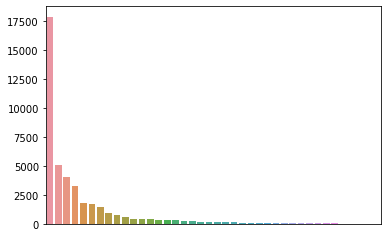

In [4]:
import seaborn as sns
# df_test
# dict(Counter(df_test.label)).items
type_num = sorted(dict(Counter(df_test.label)).items(), key=lambda x: x[1], reverse=True)
type_num_df = pandas.DataFrame(type_num)
print(type_num_df)
p = sns.barplot(x=type_num_df.index.values, y=1, data=type_num_df)
# p = sns.lineplot(x=type_num_df.index.values, y=1, data=type_num_df)
# p.set_xlabel("X-Axis")
p.set_ylabel("")
p.set_xticks([])
fig = p.get_figure()
fig.savefig("./save/pic/type-size.pdf",dpi = 400, facecolor = "w")
fig.clear()

In [26]:
seed = 0
df_dict = {}
train_dict = {i:{} for i in range(10)}
test_dict = {i:{} for i in range(10)}
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, shuffle = True, random_state = seed)
for i in Counter(df_test.label.values):
    df_dict[i] = df_test[df_test.label == i]
    if Counter(df_test.label.values)[i] < 10 :
        df_dict[i] = pandas.concat([df_dict[i], df_dict[i].sample(n = 10 - Counter(df_test.label.values)[i], random_state=seed)])


    if Counter(df_test.label.values)[i] >= 400: 
        df_dict[i] = df_dict[i].sample(n=400, random_state=seed)
    elif Counter(df_test.label.values)[i] < 400 and Counter(df_test.label.values)[i] >= 80:
        df_dict[i] = df_dict[i].sample(n=80, random_state=seed)
    # elif Counter(df_test.label.values)[i] < 80 :
    #     df_dict[i] = pandas.concat([df_dict[i], df_dict[i].sample(n = 10 - Counter(df_test.label.values)[i], random_state=seed)])
    for epoch, result in enumerate(kf.split(df_dict[i])):
        train_dict[epoch][i]  = df_dict[i].iloc[result[0]]
        test_dict[epoch][i] =  df_dict[i].iloc[result[1]] 
        # if i == 25:
        train_dict[epoch][i].drop_duplicates("code","first", inplace=True)
        train_dict[epoch][i] = train_dict[epoch][i][train_dict[epoch][i].code.apply(lambda x : x not in test_dict[epoch][i].code.values)]
train_all = {i:pandas.concat(train_dict[i], axis=0, ignore_index=True) for i in train_dict}
test_all = {i:pandas.concat(test_dict[i], axis=0, ignore_index=True) for i in test_dict}

/tmp/ipykernel_32208/1976209569.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop_duplicates except for the argument 'subset' will be keyword-only.
  train_dict[epoch][i].drop_duplicates("code","first", inplace=True)
/tmp/ipykernel_32208/1976209569.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_dict[epoch][i].drop_duplicates("code","first", inplace=True)
/tmp/ipykernel_32208/1976209569.py:23: FutureWarning: In a future version of pandas all arguments of DataFrame.drop_duplicates except for the argument 'subset' will be keyword-only.
  train_dict[epoch][i].drop_duplicates("code","first", inplace=True)
/tmp/ipykernel_32208/1976209569.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docum

In [29]:
train_all[2]

,code,label,code1
0,void CWE319_Cleartext_Tx_Sensitive_Info__w32_c...,31,void FUN1 ( ) char * VAR1 ; char VAR2 [ 100 ] ...
1,void CWE319_Cleartext_Tx_Sensitive_Info__w32_c...,31,void FUN1 ( ) char * VAR1 ; char VAR2 [ 100 ] ...
2,void CWE319_Cleartext_Tx_Sensitive_Info__w32_w...,31,void FUN1 ( ) wchar_t * VAR1 ; wchar_t VAR2 [ ...
3,void CWE319_Cleartext_Tx_Sensitive_Info__w32_c...,31,void FUN1 ( ) char * VAR1 ; char VAR2 [ 100 ] ...
4,void CWE319_Cleartext_Tx_Sensitive_Info__w32_c...,31,void FUN1 ( ) char * VAR1 ; char VAR2 [ 100 ] ...
...,...,...,...
6069,void CWE426_Untrusted_Search_Path__wchar_t_pop...,5,void FUN1 ( ) wchar_t * VAR1 ; wchar_t VAR2 [ ...
6070,void CWE426_Untrusted_Search_Path__wchar_t_pop...,5,void FUN1 ( ) wchar_t * VAR1 ; wchar_t VAR2 [ ...
6071,void CWE426_Untrusted_Search_Path__char_popen_...,5,void FUN1 ( ) char * VAR1 ; char VAR2 [ 100 ] ...
6072,void CWE426_Untrusted_Search_Path__char_popen_...,5,void FUN1 ( ) char * VAR1 ; char VAR2 [ 100 ] ...


In [31]:
num = 0
for num in range(9):
    print(len(train_all[num]), len(test_all[num]),len(train_all[num]) + len(test_all[num]))

6071 682 6753
6073 680 6753
6074 679 6753
6074 679 6753
6075 678 6753
6079 674 6753
6081 672 6753
6082 671 6753
6082 671 6753


In [32]:
Counter(train_all[0].label)

Counter({31: 360,
         3: 360,
         9: 360,
         19: 360,
         35: 360,
         2: 360,
         0: 360,
         11: 360,
         24: 72,
         14: 360,
         33: 360,
         15: 72,
         10: 72,
         1: 360,
         13: 360,
         34: 72,
         37: 18,
         8: 72,
         28: 360,
         6: 54,
         17: 72,
         36: 49,
         20: 40,
         21: 54,
         22: 58,
         4: 72,
         7: 72,
         16: 72,
         30: 72,
         38: 72,
         32: 72,
         27: 72,
         29: 33,
         18: 37,
         39: 14,
         25: 5,
         12: 27,
         23: 12,
         26: 40,
         5: 14})

In [33]:
import pickle
f = open("/mnt/qm_data/small-ase2022/data/mvd_down_40_train.pkl", 'wb')
pickle.dump(train_all, f)
f.close()
f = open("/mnt/qm_data/small-ase2022/data/mvd_down_40_test.pkl", 'wb')
pickle.dump(test_all, f)
f.close()

In [34]:
import pickle
f = open("/mnt/qm_data/small-ase2022/data/mvd_down_40_train.pkl", 'rb')
test_train = pickle.load(f)
f.close()
f = open("/mnt/qm_data/small-ase2022/data/mvd_down_40_test.pkl", 'rb')
test_test = pickle.load(f)
f.close()

In [40]:
test_train[3]

,code,label,code1
0,void CWE319_Cleartext_Tx_Sensitive_Info__w32_c...,31,void FUN1 ( ) char * VAR1 ; char VAR2 [ 100 ] ...
1,void CWE319_Cleartext_Tx_Sensitive_Info__w32_c...,31,void FUN1 ( ) char * VAR1 ; char VAR2 [ 100 ] ...
2,void CWE319_Cleartext_Tx_Sensitive_Info__w32_w...,31,void FUN1 ( ) wchar_t * VAR1 ; wchar_t VAR2 [ ...
3,void CWE319_Cleartext_Tx_Sensitive_Info__w32_c...,31,void FUN1 ( ) char * VAR1 ; char VAR2 [ 100 ] ...
4,void CWE319_Cleartext_Tx_Sensitive_Info__w32_c...,31,void FUN1 ( ) char * VAR1 ; char VAR2 [ 100 ] ...
...,...,...,...
6069,void CWE426_Untrusted_Search_Path__wchar_t_pop...,5,void FUN1 ( ) wchar_t * VAR1 ; wchar_t VAR2 [ ...
6070,void CWE426_Untrusted_Search_Path__wchar_t_pop...,5,void FUN1 ( ) wchar_t * VAR1 ; wchar_t VAR2 [ ...
6071,void CWE426_Untrusted_Search_Path__char_popen_...,5,void FUN1 ( ) char * VAR1 ; char VAR2 [ 100 ] ...
6072,void CWE426_Untrusted_Search_Path__wchar_t_pop...,5,void FUN1 ( ) int VAR1 ; wchar_t * VAR2 ; wcha...


In [7]:
df_test.code.apply(lambda x: x.split()).values

array([list(['void', 'CWE319_Cleartext_Tx_Sensitive_Info__w32_wchar_t_listen_socket_41_bad', '(', ')', 'wchar_t', '*', 'password', ';', 'wchar_t', 'passwordBuffer', '[', '100', ']', '=', 'L', '""', 'password', '=', 'passwordBuffer', ';', 'WSADATA', 'wsaData', ';', 'int', 'recvResult', ';', 'struct', 'sockaddr_in', 'service', ';', 'size_t', 'passwordLen', '=', 'wcslen', '(', 'password', ')', ';', 'if', '(', 'WSAStartup', '(', 'MAKEWORD', '(', '2', ',', '2', ')', ',', '&', 'wsaData', ')', '!=', 'NO_ERROR', ')', 'listenSocket', '=', 'socket', '(', 'AF_INET', ',', 'SOCK_STREAM', ',', 'IPPROTO_TCP', ')', ';', 'if', '(', 'listenSocket', '==', 'INVALID_SOCKET', ')', 'memset', '(', '&', 'service', ',', '0', ',', 'sizeof', '(', 'service', ')', ')', ';', 'service', '.', 'sin_family', '=', 'AF_INET', ';', 'service', '.', 'sin_addr', '.', 's_addr', '=', 'INADDR_ANY', ';', 'service', '.', 'sin_port', '=', 'htons', '(', 'TCP_PORT', ')', ';', 'if', '(', 'bind', '(', 'listenSocket', ',', '(', 'struct'

In [8]:
from gensim.models import Word2Vec
vector_length = 768
model = Word2Vec(df_test.code.apply(lambda x: x.split()).values, min_count=1, vector_size=vector_length, sg=1)


In [10]:
model.wv["CWE319_Cleartext_Tx_Sensitive_Info__w32_char_listen_socket_52b_badSink"]

array([ 1.52366394e-02, -2.84249112e-02,  8.27299505e-02,  5.47875511e-03,
       -1.48144560e-02, -9.13635641e-03,  1.61473025e-02, -3.59396636e-03,
        4.11984734e-02,  6.66855127e-02,  7.11142123e-02, -2.97263805e-02,
       -4.02225852e-02, -1.05684482e-01,  5.40313162e-02, -4.83374931e-02,
        1.02089187e-02,  3.02217365e-03,  1.59150024e-03, -4.22994932e-03,
        2.53001191e-02,  1.04903406e-03,  3.86193581e-02, -1.53148258e-02,
       -3.93118933e-02,  1.86244473e-02,  5.51166907e-02, -5.76274358e-02,
       -3.64431106e-02, -2.15286966e-02,  1.79866166e-03,  5.54876663e-02,
       -6.22444525e-02,  6.60630912e-02, -8.35952256e-03,  1.34150609e-01,
       -1.78765636e-02,  6.07039705e-02,  2.01859768e-03, -3.21079940e-02,
       -8.07572231e-02, -2.75327545e-02, -2.36754194e-02, -5.56659177e-02,
       -1.56640671e-02, -9.08366870e-03,  1.21004712e-02, -4.98068780e-02,
       -3.54729965e-02, -5.18999174e-02, -5.21873683e-03,  8.85372516e-03,
       -5.38932607e-02,  

In [12]:
# model.wv[";"]
import pickle
f = open("/mnt/qm_data/small-ase2022/data/mvd_allkfold_40_word2vec_nosub_embedding.pkl", 'wb')
pickle.dump(model.wv, f)
f.close()

In [141]:
num = 0
Counter(test_train[num].label)

Counter({31: 90,
         3: 90,
         9: 90,
         19: 90,
         35: 90,
         2: 90,
         0: 90,
         11: 90,
         24: 90,
         14: 90,
         33: 90,
         15: 90,
         10: 90,
         1: 90,
         13: 90,
         34: 90,
         37: 9,
         8: 90,
         28: 90,
         6: 9,
         17: 90,
         36: 9,
         20: 9,
         21: 9,
         22: 9,
         4: 90,
         7: 90,
         16: 90,
         30: 9,
         38: 9,
         32: 90,
         27: 9,
         29: 9,
         18: 9,
         39: 9,
         25: 5,
         12: 9,
         23: 9,
         26: 9,
         5: 9})

In [154]:
df_dict[25]

,code,label,code1
1266,void * delNonAlpha ( void * data ) struct ston...,25,void * FUN1 ( void * VAR1 ) struct VAR2 * VAR3...
2351,void * delNonAlpha ( void * data ) struct ston...,25,void * FUN1 ( void * VAR1 ) struct VAR2 * VAR3...
3440,void * delNonAlpha ( void * data ) struct ston...,25,void * FUN1 ( void * VAR1 ) struct VAR2 * VAR3...
7606,void * delNonAlpha ( void * data ) struct ston...,25,void * FUN1 ( void * VAR1 ) struct VAR2 * VAR3...
8393,void * reverseStr ( void * data ) struct stone...,25,void * FUN1 ( void * VAR1 ) struct VAR2 * VAR3...
16459,void * delNonAlpha ( void * data ) struct ston...,25,void * FUN1 ( void * VAR1 ) struct VAR2 * VAR3...
16459,void * delNonAlpha ( void * data ) struct ston...,25,void * FUN1 ( void * VAR1 ) struct VAR2 * VAR3...
3440,void * delNonAlpha ( void * data ) struct ston...,25,void * FUN1 ( void * VAR1 ) struct VAR2 * VAR3...
2351,void * delNonAlpha ( void * data ) struct ston...,25,void * FUN1 ( void * VAR1 ) struct VAR2 * VAR3...
7606,void * delNonAlpha ( void * data ) struct ston...,25,void * FUN1 ( void * VAR1 ) struct VAR2 * VAR3...


In [120]:
pandas.concat(df_dict, axis=0, ignore_index=True)

,code,label,code1
0,void CWE319_Cleartext_Tx_Sensitive_Info__w32_c...,31,void FUN1 ( ) char * VAR1 ; char VAR2 [ 100 ] ...
1,void CWE319_Cleartext_Tx_Sensitive_Info__w32_c...,31,void FUN1 ( ) char * VAR1 ; char VAR2 [ 100 ] ...
2,void CWE319_Cleartext_Tx_Sensitive_Info__w32_w...,31,void FUN1 ( ) wchar_t * VAR1 ; wchar_t VAR2 [ ...
3,void CWE319_Cleartext_Tx_Sensitive_Info__w32_c...,31,void FUN1 ( ) char * VAR1 ; char VAR2 [ 100 ] ...
4,void CWE319_Cleartext_Tx_Sensitive_Info__w32_c...,31,void FUN1 ( ) char * VAR1 ; char VAR2 [ 100 ] ...
...,...,...,...
2465,void CWE426_Untrusted_Search_Path__wchar_t_pop...,5,void FUN1 ( ) wchar_t * VAR1 ; wchar_t VAR2 [ ...
2466,void CWE426_Untrusted_Search_Path__wchar_t_pop...,5,void FUN1 ( ) wchar_t * VAR1 ; wchar_t VAR2 [ ...
2467,void CWE426_Untrusted_Search_Path__char_popen_...,5,void FUN1 ( ) char * VAR1 ; char VAR2 [ 100 ] ...
2468,void CWE426_Untrusted_Search_Path__wchar_t_pop...,5,void FUN1 ( ) wchar_t * VAR1 ; wchar_t VAR2 [ ...


In [ ]:
print(train_dict[0][25].index.values)
print(test_dict[0][25].index.values)
df_dict[25]

In [65]:
from collections import Counter
# Counter(df_test.label)
df_test = df_dict[0]
counter_dict = {}
for i in Counter(df_test.label.values):
    counter_dict[i] = Counter(df_test.label.values)[i]
result = sorted(counter_dict.items(), key=lambda x: x[1]) 

AttributeError: 'dict' object has no attribute 'label'

In [103]:
import numpy as np
import pandas as pd
np.random.seed(100)
df = pd.DataFrame(np.random.random((10,5)), columns=list('ABCDE'))
# df.index = df.index * 10
df
from sklearn.model_selection import KFold

#added some parameters
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)

In [110]:
df = df_dict[25]
def get_kfole(df, kf):
    for i, result in enumerate(kf.split(df)):
        train_df = df.iloc[result[0]]
        test_df =  df.iloc[result[1]]
        print(i)
        print(train_df)
        print(test_df)

0
                                                    code  label  \
1266   void * delNonAlpha ( void * data ) struct ston...     25   
2351   void * delNonAlpha ( void * data ) struct ston...     25   
3440   void * delNonAlpha ( void * data ) struct ston...     25   
7606   void * delNonAlpha ( void * data ) struct ston...     25   
16459  void * delNonAlpha ( void * data ) struct ston...     25   
16459  void * delNonAlpha ( void * data ) struct ston...     25   
3440   void * delNonAlpha ( void * data ) struct ston...     25   
2351   void * delNonAlpha ( void * data ) struct ston...     25   
7606   void * delNonAlpha ( void * data ) struct ston...     25   

                                                   code1  
1266   void * FUN1 ( void * VAR1 ) struct VAR2 * VAR3...  
2351   void * FUN1 ( void * VAR1 ) struct VAR2 * VAR3...  
3440   void * FUN1 ( void * VAR1 ) struct VAR2 * VAR3...  
7606   void * FUN1 ( void * VAR1 ) struct VAR2 * VAR3...  
16459  void * FUN1 ( void * VAR1